### ---Import Labraries and Dataset 

In [133]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

# installing auto arima
# pip install --user pmdarima

# installing fbprophet
# pip install --user fbprophet
# !pip install --upgrade plotly

In [2]:
#Read files:
data = pd.read_csv("tesla.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2679 non-null   object 
 1   High       2679 non-null   float64
 2   Low        2679 non-null   float64
 3   Open       2679 non-null   float64
 4   Close      2679 non-null   float64
 5   Volume     2679 non-null   float64
 6   Adj Close  2679 non-null   float64
dtypes: float64(6), object(1)
memory usage: 146.6+ KB


In [11]:
print("Data Shape:", data.shape)
data.describe(include ="all")

Data Shape: (2679, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
count,2679,2679.000000,2679.000000,2679.000000,2679.000000,2.679000e+03,2679.000000
unique,2679,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-06-04,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,71.456871,68.343933,69.925943,70.028605,3.176344e+07,70.028605
std,NaN,127.593072,121.612343,124.658055,125.036783,2.914939e+07,125.036783
min,NaN,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,NaN,7.691000,7.414000,7.581000,7.575000,1.130900e+07,7.575000
50%,NaN,45.495998,44.000000,44.650002,44.646000,2.503650e+07,44.646000
75%,NaN,62.341000,60.201000,61.339001,61.503000,4.107750e+07,61.503000


In [642]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222
5,2010-07-07,3.326,2.996,3.280,3.160,34608500.0,3.160
6,2010-07-08,3.504,3.114,3.228,3.492,38557000.0,3.492
7,2010-07-09,3.580,3.310,3.516,3.480,20253000.0,3.480
8,2010-07-12,3.614,3.400,3.590,3.410,11012500.0,3.410
9,2010-07-13,3.728,3.380,3.478,3.628,13400500.0,3.628


In [643]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
2669,2021-02-04,856.500000,833.419983,855.000000,849.989990,15812700.0,849.989990
2670,2021-02-05,864.770020,838.969971,845.000000,852.229980,18524800.0,852.229980
2671,2021-02-08,877.770020,854.750000,869.669983,863.419983,20161700.0,863.419983
2672,2021-02-09,859.799988,841.750000,855.119995,849.460022,15157700.0,849.460022
2673,2021-02-10,844.820007,800.020020,843.640015,804.820007,36216100.0,804.820007
2674,2021-02-11,829.880005,801.729980,812.440002,811.659973,21580700.0,811.659973
2675,2021-02-12,817.330017,785.330017,801.260010,816.119995,23701700.0,816.119995
2676,2021-02-16,821.000000,792.440002,818.000000,796.219971,19686700.0,796.219971
2677,2021-02-17,799.840027,762.010010,779.090027,798.150024,25996500.0,798.150024
2678,2021-02-18,794.690002,776.270020,780.900024,787.380005,17897000.0,787.380005


In [26]:
#filter categrorical variables 
cat_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#filter Cont. variables 
cont_columns = [x for x in data.dtypes.index if data.dtypes[x]=='float64']

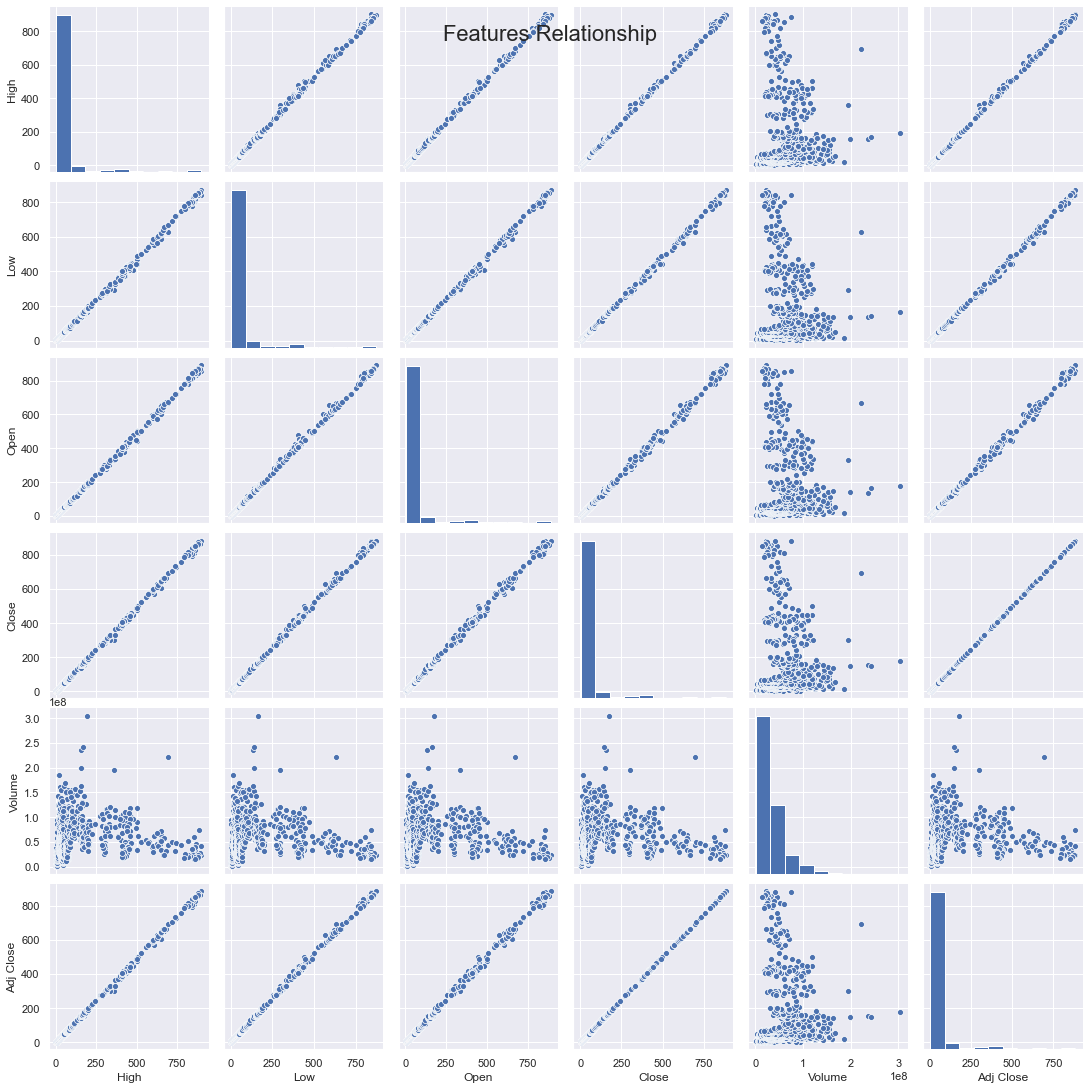

In [14]:
# Visualize the Cont. variables relationships 
sns.set_style(style="darkgrid")
sns.pairplot(data, 
             vars = cont_columns)

plt.suptitle('Features Relationship', size = 22);
plt.show()

In [15]:
# Variables correlation
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999551,0.999700,0.999739,0.286882,0.999739
Low,0.999551,1.000000,0.999643,0.999626,0.275230,0.999626
Open,0.999700,0.999643,1.000000,0.999343,0.280978,0.999343
Close,0.999739,0.999626,0.999343,1.000000,0.281716,1.000000
Volume,0.286882,0.275230,0.280978,0.281716,1.000000,0.281716
Adj Close,0.999739,0.999626,0.999343,1.000000,0.281716,1.000000


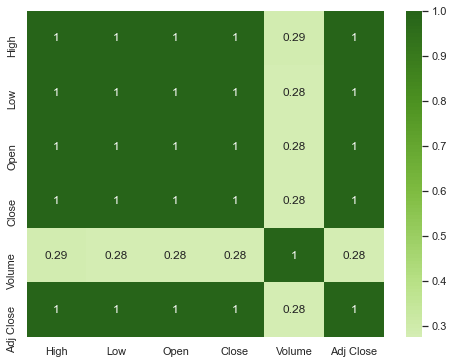

In [33]:
# Heatmap correlation
ht = sns.heatmap(data.corr(),center=0, annot=True, cmap="PiYG")

### -- Handling Missing Values

In [645]:
data.apply(lambda x: sum(x.isnull()))

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## -- Oultliers

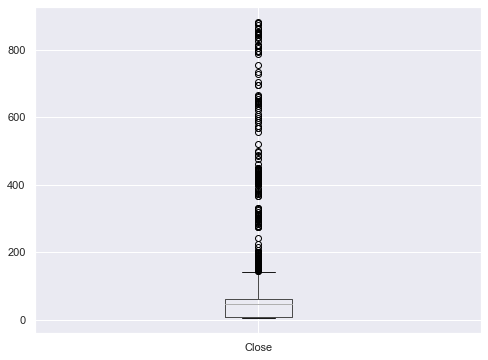

In [646]:
# Checking Outliers in Close Price
data.boxplot(column='Close')

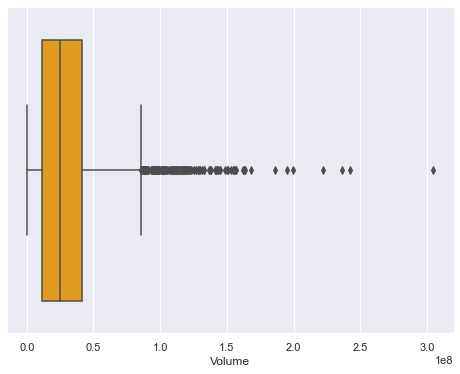

In [48]:
# Checking Outliers in Volume

sns.boxplot(x=data['Volume'], color='Orange')

In [35]:
#filter Cont. variables 
cont_col_exc_vol = [x for x in cont_columns if x !='Volume']
cont_col_exc_vol

['High', 'Low', 'Open', 'Close', 'Adj Close']

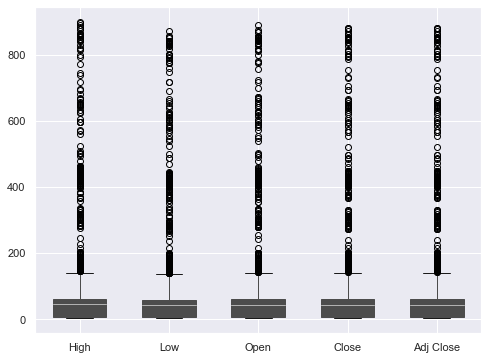

In [50]:

# Checking Outliers in Prices Varibles
data.boxplot(column=cont_col_exc_vol, widths = 0.6, patch_artist = True)

In [45]:
# Change type Od Date  
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].dtype)

datetime64[ns]


In [46]:
data.set_index('Date', inplace=True)

In [47]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


Text(0, 0.5, 'Frequency')

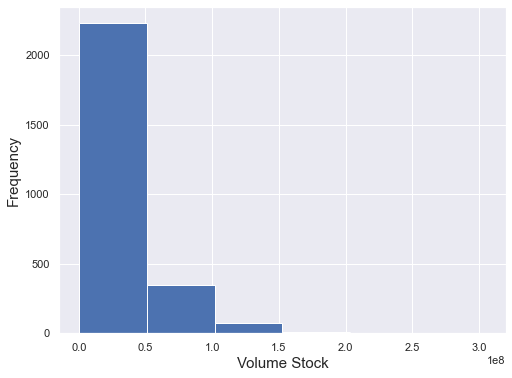

In [60]:
data['Volume'].hist(bins=6)
plt.xlabel("Volume Stock", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

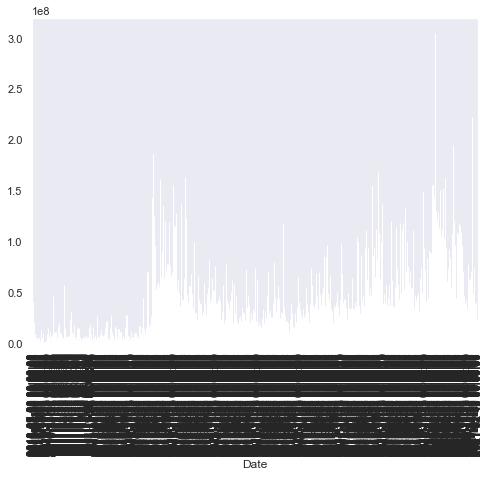

In [65]:
data['Volume'].plot(kind='bar', stacked =True, color = ['red','blue'], grid = False)

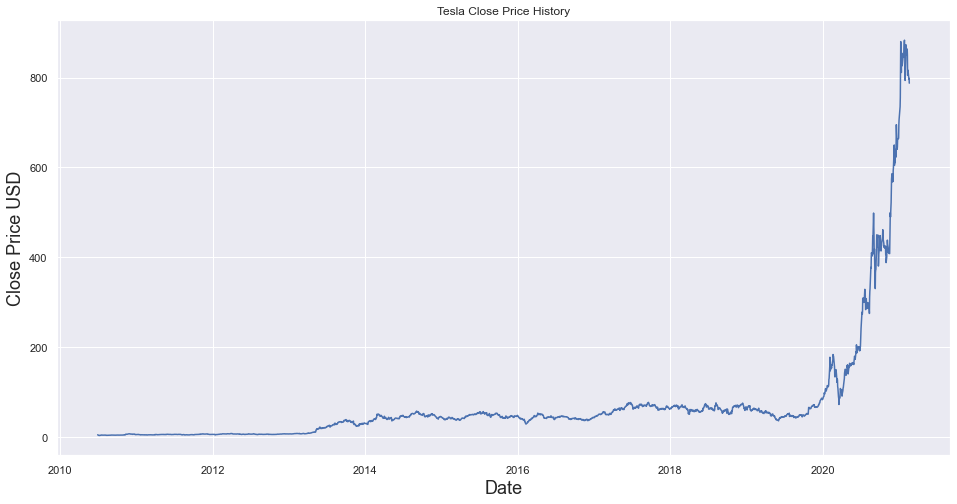

In [670]:
#Visulize The Closing price history 
plt.figure(figsize=(16,8))
plt.title('Tesla Close Price History')
plt.plot(data.index, data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()

### -- Check Stationary

##### The Close price and Timesetries data should be non stationary 

In [683]:
df = data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [684]:
df['middle_band'] = df['Close'].rolling(window=50).mean()
df['upper_band'] = df['Close'].rolling(window=50).mean() + df['Close'].rolling(window=50).std()*2
df['lower_band'] = df['Close'].rolling(window=50).mean() - df['Close'].rolling(window=50).std()*2

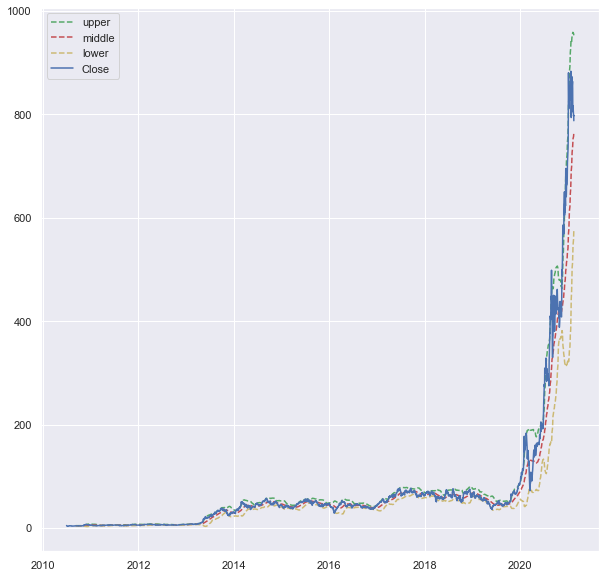

In [685]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'g--', label="upper")
plt.plot(df['middle_band'], 'r--', label="middle")
plt.plot(df['lower_band'], 'y--', label="lower")
plt.plot(df.index, df['Close'], label="Close")
plt.legend()
plt.show()

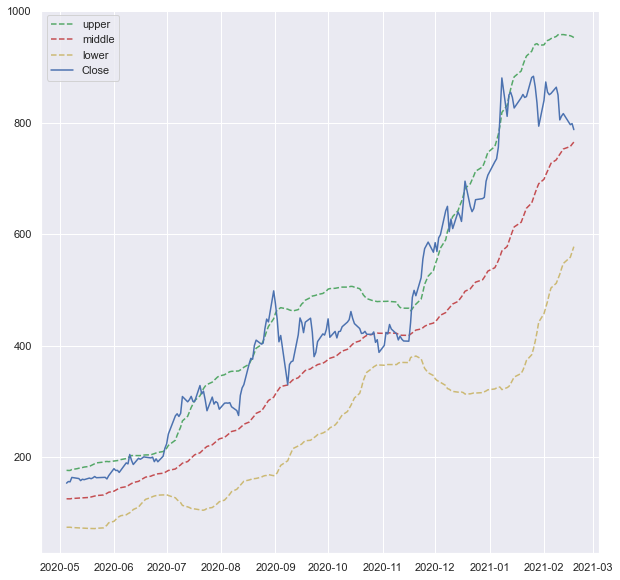

In [689]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'].iloc[-200:], 'g--', label="upper")
plt.plot(df['middle_band'].iloc[-200:], 'r--', label="middle Mean")
plt.plot(df['lower_band'].iloc[-200:], 'y--', label="lower")
plt.plot(df['Close'].iloc[-200:], label="Close")
plt.legend()
plt.show()

## __ ARima Model

In [101]:
#Read files:
data = pd.read_csv("tesla.csv")

In [102]:
# Limiting the columns we need
forecast_data = data[['Date','Close']]
forecast_data.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [103]:
forecast_data['Date'].dtype

dtype('O')

In [104]:
# Change type Od Date  
forecast_data['Date'] = pd.to_datetime(forecast_data['Date'])
print(forecast_data['Date'].dtype)

datetime64[ns]


##### --Add Month, Quarter

In [105]:
# Add Month and Quarter columns to dataset 

forecast_data['Year'] = forecast_data['Date'].dt.year
forecast_data['Qtr'] = forecast_data['Date'].dt.quarter
forecast_data['Month'] = forecast_data['Date'].dt.month 

forecast_data.head()

,Date,Close,Year,Qtr,Month
0,2010-06-29,4.778,2010,2,6
1,2010-06-30,4.766,2010,2,6
2,2010-07-01,4.392,2010,3,7
3,2010-07-02,3.840,2010,3,7
4,2010-07-06,3.222,2010,3,7


In [106]:
forecast_data['Mon_Year'] = forecast_data['Date'].dt.strftime('%b-%Y')
forecast_data.head()

,Date,Close,Year,Qtr,Month,Mon_Year
0,2010-06-29,4.778,2010,2,6,Jun-2010
1,2010-06-30,4.766,2010,2,6,Jun-2010
2,2010-07-01,4.392,2010,3,7,Jul-2010
3,2010-07-02,3.840,2010,3,7,Jul-2010
4,2010-07-06,3.222,2010,3,7,Jul-2010


In [107]:
# Changing the time to date - Most Time Series Models require date structure
forecast_data['Mon_Year'] = forecast_data['Mon_Year'].astype(str) + '-01'
forecast_data['Year'] = forecast_data['Year'].astype(str) + '-01-01'
forecast_data['Mon_Year'] = pd.to_datetime(forecast_data['Mon_Year'])
forecast_data['Year'] = pd.to_datetime(forecast_data['Year'])
forecast_data.head()

,Date,Close,Year,Qtr,Month,Mon_Year
0,2010-06-29,4.778,2010-01-01,2,6,2010-06-01
1,2010-06-30,4.766,2010-01-01,2,6,2010-06-01
2,2010-07-01,4.392,2010-01-01,3,7,2010-07-01
3,2010-07-02,3.840,2010-01-01,3,7,2010-07-01
4,2010-07-06,3.222,2010-01-01,3,7,2010-07-01


In [108]:
forecast_data.tail(10) 

,Date,Close,Year,Qtr,Month,Mon_Year
2669,2021-02-04,849.989990,2021-01-01,1,2,2021-02-01
2670,2021-02-05,852.229980,2021-01-01,1,2,2021-02-01
2671,2021-02-08,863.419983,2021-01-01,1,2,2021-02-01
2672,2021-02-09,849.460022,2021-01-01,1,2,2021-02-01
2673,2021-02-10,804.820007,2021-01-01,1,2,2021-02-01
2674,2021-02-11,811.659973,2021-01-01,1,2,2021-02-01
2675,2021-02-12,816.119995,2021-01-01,1,2,2021-02-01
2676,2021-02-16,796.219971,2021-01-01,1,2,2021-02-01
2677,2021-02-17,798.150024,2021-01-01,1,2,2021-02-01
2678,2021-02-18,787.380005,2021-01-01,1,2,2021-02-01


In [109]:
forecast_data = forecast_data[['Date','Year','Mon_Year','Close']]
forecast_data.head()

,Date,Year,Mon_Year,Close
0,2010-06-29,2010-01-01,2010-06-01,4.778
1,2010-06-30,2010-01-01,2010-06-01,4.766
2,2010-07-01,2010-01-01,2010-07-01,4.392
3,2010-07-02,2010-01-01,2010-07-01,3.840
4,2010-07-06,2010-01-01,2010-07-01,3.222


In [110]:
from datetime import date
f_date = date(2020, 9, 22)
l_date = date(2021, 2, 19)
delta = l_date - f_date
print(delta)

print(data.shape)

150 days, 0:00:00
(2679, 7)


In [111]:
X_train = forecast_data[forecast_data['Date'] < '2020-09-22']
X_valid = forecast_data[forecast_data['Date'] >= '2020-07-16']

print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)

X_train['Year'].unique()

X_train shape (2576, 4)
X_valid shape (150, 4)


array(['2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

#### Running Arima (Autoregressive Integrated Moving Average) 
ARIMA:
Uses a number of lagged observations of time series to forecast observations
Inputs / Parameters:

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

###### p: the number of lag observations in the model; also known as the lag order (AR)
###### d: the number of times that the raw observations are differenced; also known as the degree of differencing (I)
###### q: the size of the moving average window; also known as the order of the moving average (MA)

In [112]:
# filtering the train data
df_train = X_train[['Mon_Year', 'Close']]

#filtering the valid data

df_valid = X_valid[['Mon_Year', 'Close']]
df_valid_1 = df_valid
# set the date into index
df_train.set_index('Mon_Year', inplace=True)
df_valid_1.set_index('Mon_Year', inplace=True)



In [113]:
df_valid

,Close
Mon_Year,
2020-07-01,300.127991
2020-07-01,300.167999
2020-07-01,328.600006
2020-07-01,313.671997
2020-07-01,318.466003
...,...
2021-02-01,811.659973
2021-02-01,816.119995
2021-02-01,796.219971


In [123]:
# Setting the Index for next 
index_months  = pd.date_range(df_train.index[-1], freq='D', periods = 150) 

index_months

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28'],
              dtype='datetime64[ns]', length=150, freq='D')

In [124]:
# Running ARIMA with random numbers 
model_arima = ARIMA(df_train, order=(3, 2, 4)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)
model_arima_fit

In [138]:
# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(150)[0]
fcast1

array([443.895711, 458.212631, 462.860207, 454.408959, 459.863732,
       468.736308, 464.361084, 463.873834, 472.266975, 472.954105,
       470.269658, 475.621728, 479.658580, 477.771569, 479.975147,
       484.962708, 485.181450, 485.540694, 489.743130, 491.879578,
       491.914273, 494.713744, 497.834850, 498.525967, 500.189628,
       503.354795, 504.961017, 506.129183, 508.800850, 511.069925,
       512.311812, 514.407750, 516.914427, 518.513554, 520.238628,
       522.646201, 524.605547, 526.234505, 528.400941, 530.567244,
       532.294486, 534.246767, 536.446816, 538.338206, 540.184985,
       542.309539, 544.331430, 546.179432, 548.201874, 550.280223,
       552.188905, 554.139779, 556.210285, 558.187255, 560.115452,
       562.147034, 564.167968, 566.111348, 568.104727, 570.138197,
       572.112135, 574.085287, 576.109543, 578.110342, 580.082990,
       582.091047, 584.106073, 586.090366, 588.086416, 590.103570,
       592.102216, 594.094812, 596.107528, 598.116846, 600.113

In [139]:
# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_months)
fcast1 = fcast1.rename("Arima") 
fcast1

2020-09-01    443.895711
2020-09-02    458.212631
2020-09-03    462.860207
2020-09-04    454.408959
2020-09-05    459.863732
                 ...    
2021-01-24    744.564784
2021-01-25    746.628031
2021-01-26    748.692084
2021-01-27    750.756927
2021-01-28    752.822568
Freq: D, Name: Arima, Length: 150, dtype: float64

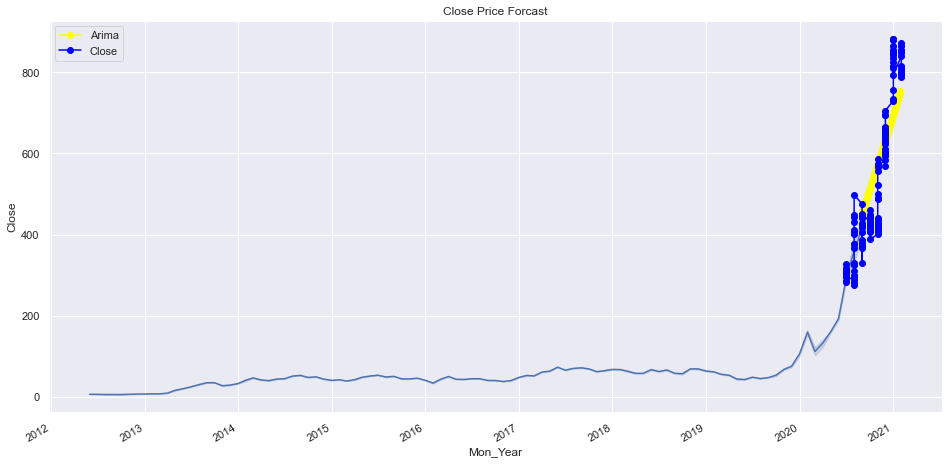

In [140]:
# Ploting the predictions
fig, ax = plt.subplots(figsize=(16,8))
chart = sns.lineplot(x='Mon_Year', y='Close', data = X_train[500:])
chart.set_title('Close Price Forcast')
fcast1.plot(ax=ax, color='yellow', marker="o", legend=True)
df_valid.plot(ax=ax, color='blue', marker="o", legend=True)


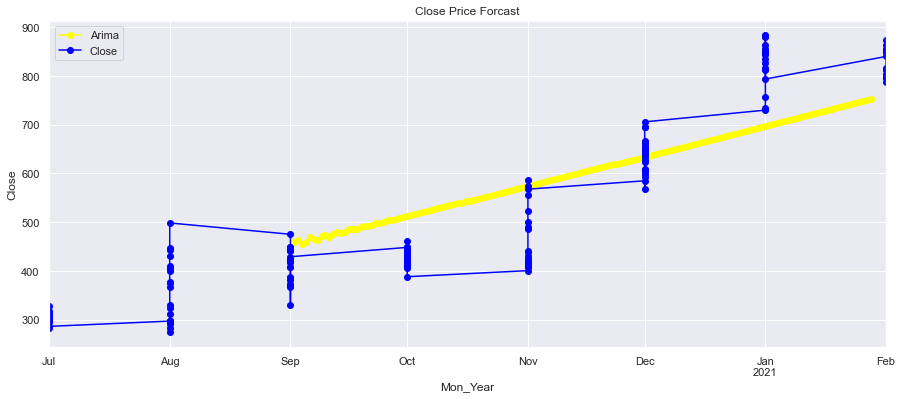

In [141]:
# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,6))
chart = sns.lineplot(x='Year', y='Close', data = X_train[2500:0])
chart.set_title('Close Price Forcast')
fcast1.plot(ax=ax, color='yellow', marker="o", legend=True)
df_valid.plot(ax=ax, color='blue', marker="o", legend=True)



In [142]:
# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(df_valid['Close'].values, fcast1.values, squared=False))

The MSE of ARIMA is: 133.32373894010678


In [143]:
print('The RMSE of ARIMA is:', mean_squared_error(df_valid['Close'].values, fcast1.values, squared=True))

The RMSE of ARIMA is: 17775.219364969744


In [144]:
###### Option 1: Finding the best value for ARIMA

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(df_train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

(0, 0, 0) 28096.618724242064
(0, 0, 1) 24790.97359700069
(0, 0, 2) 22234.590124948114
(0, 0, 3) 20577.61351780586
(0, 1, 0) 14485.22701319267
(0, 1, 1) 14481.914301837496
(0, 1, 2) 14451.63239565372
(0, 1, 3) 14367.563616400254
(0, 1, 4) 14337.728966980052
(0, 2, 0) 16386.845609549513
(0, 2, 1) 14468.937940389449
(0, 2, 2) 14461.424365105438
(0, 2, 3) 14437.101597797177
(0, 2, 4) 14363.872179168455
(1, 0, 0) 14515.287928496758
(1, 1, 0) 14480.988784500163
(1, 1, 1) 14480.43791422301
(1, 1, 2) 14424.225218011456
(1, 1, 3) 14362.281902717612
(1, 1, 4) 14320.475383971996
(1, 2, 0) 15402.13506990819
(1, 2, 1) 14459.99084294592
(1, 2, 2) 14459.830772383575
(1, 2, 3) 14422.419538778217
(2, 0, 0) 14513.392639275411
(2, 1, 0) 14466.299300391587
(2, 1, 1) 14453.535853070782
(2, 1, 2) 14295.296042447373
(2, 1, 3) 14235.469693854879
(2, 1, 4) 14151.109186012094
(2, 2, 0) 14931.500186481215
(2, 2, 1) 14450.924642319584
(2, 2, 2) 14463.803735881622
(2, 2, 3) 14261.0683040949
(2, 2, 4) 14219.3528360

### -- Future Forcat with Arima

In [145]:
# Setting the Index for next 
index_fut  = pd.date_range(df_valid.index[-1], freq='D', periods = 90) 

index_fut

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
      

In [146]:
# Running ARIMA with random numbers 
model_arima = ARIMA(df_train, order=(3, 2, 4)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=0)
model_arima_fit

In [147]:
# Saving ARIMA predictions
fcast2 = model_arima_fit.forecast(90)[0]
fcast2

array([443.895711, 458.212631, 462.860207, 454.408959, 459.863732,
       468.736308, 464.361084, 463.873834, 472.266975, 472.954105,
       470.269658, 475.621728, 479.658580, 477.771569, 479.975147,
       484.962708, 485.181450, 485.540694, 489.743130, 491.879578,
       491.914273, 494.713744, 497.834850, 498.525967, 500.189628,
       503.354795, 504.961017, 506.129183, 508.800850, 511.069925,
       512.311812, 514.407750, 516.914427, 518.513554, 520.238628,
       522.646201, 524.605547, 526.234505, 528.400941, 530.567244,
       532.294486, 534.246767, 536.446816, 538.338206, 540.184985,
       542.309539, 544.331430, 546.179432, 548.201874, 550.280223,
       552.188905, 554.139779, 556.210285, 558.187255, 560.115452,
       562.147034, 564.167968, 566.111348, 568.104727, 570.138197,
       572.112135, 574.085287, 576.109543, 578.110342, 580.082990,
       582.091047, 584.106073, 586.090366, 588.086416, 590.103570,
       592.102216, 594.094812, 596.107528, 598.116846, 600.113

In [148]:
# Passing the same index as the others
fcast2 = pd.Series(fcast2, index=index_fut)
fcast2 = fcast2.rename("Future Forecast") 
fcast2

2021-02-01    443.895711
2021-02-02    458.212631
2021-02-03    462.860207
2021-02-04    454.408959
2021-02-05    459.863732
                 ...    
2021-04-27    622.231079
2021-04-28    624.249228
2021-04-29    626.264310
2021-04-30    628.279376
2021-05-01    630.298827
Freq: D, Name: Future Forecast, Length: 90, dtype: float64

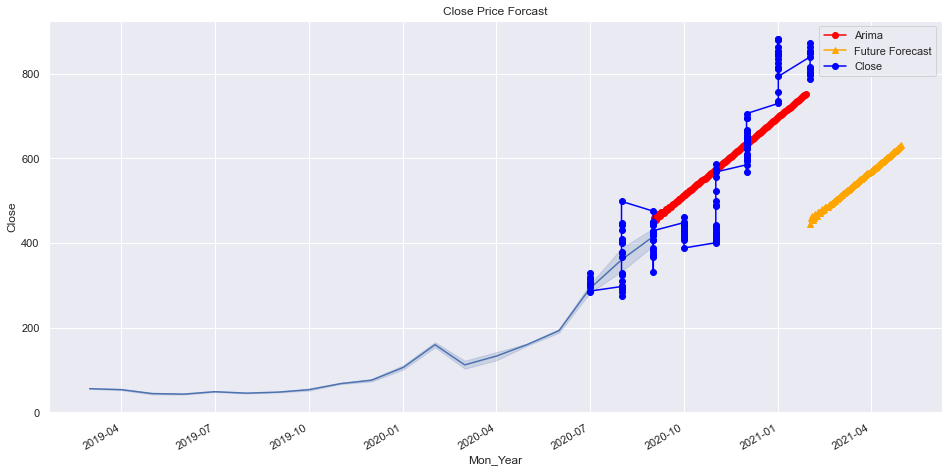

In [149]:
# Ploting the predictions
fig, ax = plt.subplots(figsize=(16,8))
chart = sns.lineplot(x='Mon_Year', y='Close', data = X_train[2200:])
chart.set_title('Close Price Forcast')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
fcast2.plot(ax=ax, color='orange', marker="^", legend=True)
df_valid.plot(ax=ax, color='blue', marker="o", legend=True)

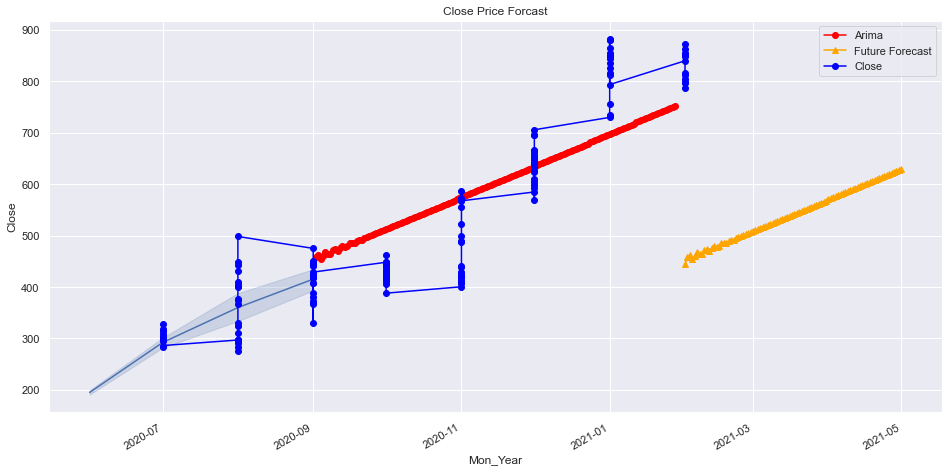

In [150]:
# Ploting the predictions
fig, ax = plt.subplots(figsize=(16,8))
chart = sns.lineplot(x='Mon_Year', y='Close', data = X_train[2500:])
chart.set_title('Close Price Forcast')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
fcast2.plot(ax=ax, color='orange', marker="^", legend=True)
df_valid.plot(ax=ax, color='blue', marker="o", legend=True)

In [151]:
###### Option 1: Finding the best value for ARIMA

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(df_train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data


(0, 0, 0) 28096.618724242064
(0, 0, 1) 24790.97359700069
(0, 0, 2) 22234.590124948114
(0, 0, 3) 20577.61351780586
(0, 1, 0) 14485.22701319267
(0, 1, 1) 14481.914301837496
(0, 1, 2) 14451.63239565372
(0, 1, 3) 14367.563616400254
(0, 1, 4) 14337.728966980052
(0, 2, 0) 16386.845609549513
(0, 2, 1) 14468.937940389449
(0, 2, 2) 14461.424365105438
(0, 2, 3) 14437.101597797177
(0, 2, 4) 14363.872179168455
(1, 0, 0) 14515.287928496758
(1, 1, 0) 14480.988784500163
(1, 1, 1) 14480.43791422301
(1, 1, 2) 14424.225218011456
(1, 1, 3) 14362.281902717612
(1, 1, 4) 14320.475383971996
(1, 2, 0) 15402.13506990819
(1, 2, 1) 14459.99084294592
(1, 2, 2) 14459.830772383575
(1, 2, 3) 14422.419538778217
(2, 0, 0) 14513.392639275411
(2, 1, 0) 14466.299300391587
(2, 1, 1) 14453.535853070782
(2, 1, 2) 14295.296042447373
(2, 1, 3) 14235.469693854879
(2, 1, 4) 14151.109186012094
(2, 2, 0) 14931.500186481215
(2, 2, 1) 14450.924642319584
(2, 2, 2) 14463.803735881622
(2, 2, 3) 14261.0683040949
(2, 2, 4) 14219.3528360

In [182]:
Fuurte_Forecast = pd.DataFrame(fcast2)
Fuurte_Forecast.rename_axis('Date', inplace=True)
Fuurte_Forecast.iloc[40:60,:]

,Future Forecast
Date,
2021-03-13,532.294486
2021-03-14,534.246767
2021-03-15,536.446816
2021-03-16,538.338206
2021-03-17,540.184985
2021-03-18,542.309539
2021-03-19,544.331430
2021-03-20,546.179432
2021-03-21,548.201874


In [262]:
# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(df_valid['Close'].values, fcast1.values, squared=False))

The MSE of ARIMA is: 133.32373894010678


In [292]:
from sklearn import metrics
import math

# calculate MAE, MSE, RMSE 
print("R Squared(R^2): ", r2_score(df_valid['Close'].values, fcast1.values))
print("MAE:", metrics.mean_absolute_error(df_valid['Close'].values, fcast1.values))
print("MSE:", metrics.mean_squared_error(df_valid['Close'].values, fcast1.values))
print("RMSE:", np.sqrt(metrics.mean_squared_error(df_valid['Close'].values, fcast1.values)))
print()
# Adjusted R Squared (R2)
n = len(df_valid['Close'].values)
k = len(df_valid['Close'].values[0:1])
R2 = r2_score(df_valid['Close'].values, fcast1.values)
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print("Adjusted R2: ", Adj_R2)

R Squared(R^2):  0.48977378869356747
MAE: 120.92903970587713
MSE: 17775.219364969744
RMSE: 133.32373894010678

Adjusted R2:  0.48632631429284834


### ___ Arima - Seconed Model 

In [69]:
df = data[["Close"]].copy()

In [70]:
df.describe()

,Close
count,2679.000000
mean,70.028605
std,125.036783
min,3.160000
25%,7.575000
50%,44.646000
75%,61.503000
max,883.090027


##### Stationarity 

##### ADF test 

In [71]:
#check if price is stationary - Using ADF Test:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())

result

(6.21024818678538,
 1.0,
 27,
 2651,
 {'1%': -3.4328191223134246,
  '5%': -2.862630872437016,
  '10%': -2.567350709015523},
 16602.47336323157)

In [72]:
print(f"ADF Statistic: {result[0]}")
print(f"P_value: {result[1]}")
if result[1] > 0.05 :
    print("\nWe fail to reject the H0 \nSo, The Close prices is non-Stationary ")

ADF Statistic: 6.21024818678538
P_value: 1.0

We fail to reject the H0 
So, The Close prices is non-Stationary 


##### Autocorrelation Function (ACF)

In [73]:
from statsmodels.graphics.tsaplots import plot_acf 

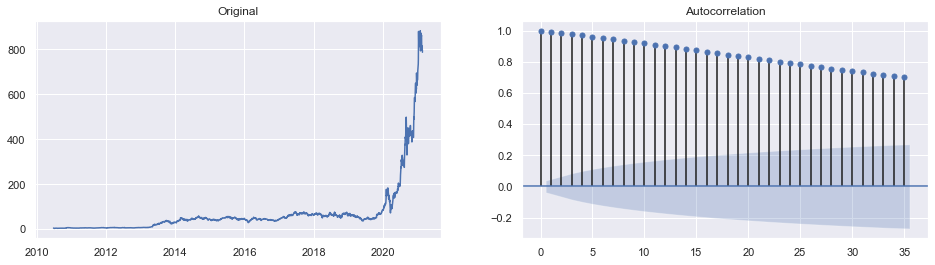

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
#add : at the end the plot fuction so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

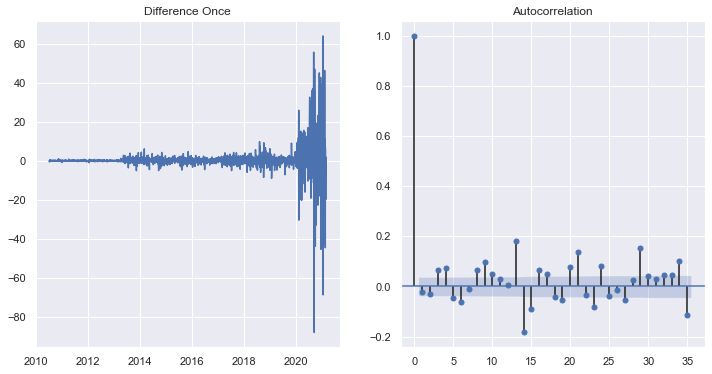

In [75]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);

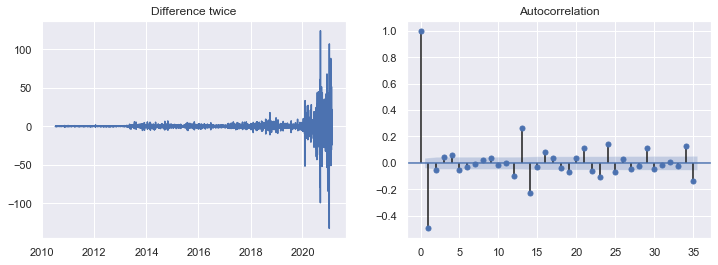

In [76]:
diff2 = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))

ax1.plot(diff2)
ax1.set_title("Difference twice")
plot_acf(diff2, ax=ax2);

##### d: number of differncing 

In [77]:
from pmdarima.arima.utils import ndiffs 

In [78]:
ndiffs(df.Close, test="adf" )

1

#####  p

In [79]:
from statsmodels.graphics.tsaplots import plot_pacf

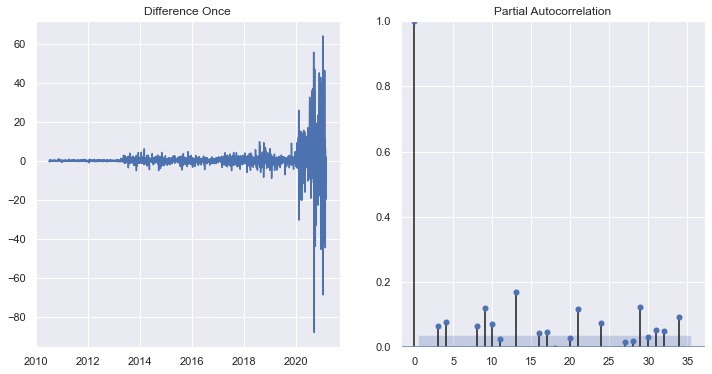

In [80]:
diff_p = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.plot(diff_p)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff_p, ax=ax2);

##### q

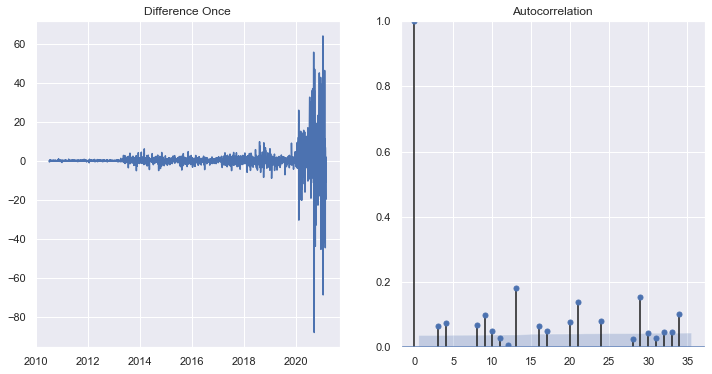

In [81]:
diff_q = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.plot(diff_p)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff_q, ax=ax2);

##### Fitting Arima Model

In [82]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model: p=3, d=1, q=3
model = ARIMA(df.Close, order=(3, 1, 3))
result = model.fit(disp=-1)

In [83]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2678
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8559.240
Method:                       css-mle   S.D. of innovations              5.913
Date:                Sat, 27 Mar 2021   AIC                          17134.480
Time:                        10:20:04   BIC                          17181.623
Sample:                             1   HQIC                         17151.535
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2911      0.123      2.357      0.018       0.049       0.533
ar.L1.D.Close     0.5918      0.181      3.264      0.001       0.236       0.947
ar.L2.D.Close    -0.4099      0.193     -2.128      0.033      -0.787      -0.032
ar.L3.D.Close    -0.1978      0.167     -1.184      0.236      -0.525       0.130
ma.L1.D.Close    -0.6183      0.178     -3.472      0.001      -0.967      -0.269
ma.L2.D.Close     0.4315      0.195      2.218      0.027       0.050       0.813
ma.L3.D.Close     0.2848      0.172      1.657      0.098      -0.052       0.622
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6604           -1.0266j            1.2206           -0.1590
AR.2            0.6604           +1.0266j            1.2206            0.1590
AR.3           -3.3930           -0.0000j            3.3930           -0.5000
MA.1            0.6232           -0.9397j            1.1276           -0.1568
MA.2            0.6232           +0.9397j            1.1276            0.1568
MA.3           -2.7620           -0.0000j            2.7620           -0.5000
-----------------------------------------------------------------------------
"""

(array([[0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
        [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
        [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
        ...,
        [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
        [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
        [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000]]),
 array([-82.580451, -67.933906, -53.287361, -38.640816, -23.994271,
        -9.347727, 5.298818, 19.945363, 34.591908, 49.238453, 63.884998]),
 <a list of 2678 Lists of Patches objects>)

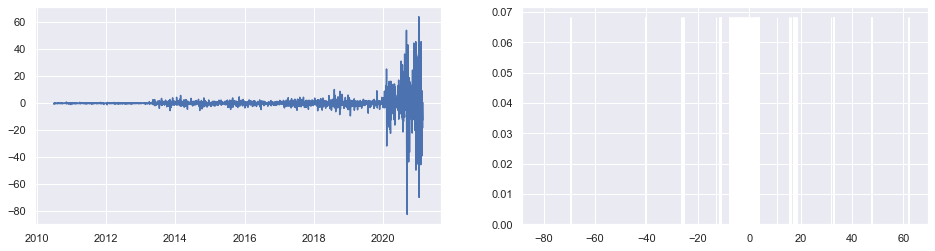

In [84]:
#PLot residual errors 
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

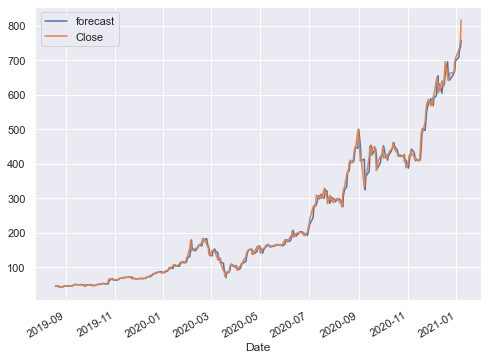

In [85]:
#Actual vs Fitted
result.plot_predict(start=2300, end=2650, dynamic=False,);

##### Train Test Split

In [94]:
n = int(len(df)*0.8)
train = df.Close[:n]
test = df.Close[n:] 

In [95]:
print(len(train))
print(len(test))

2143
536


In [96]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.Close, order=(3, 1, 3))
result = model.fit(disp=0)

In [97]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2678
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8559.240
Method:                       css-mle   S.D. of innovations              5.913
Date:                Sat, 27 Mar 2021   AIC                          17134.480
Time:                        10:20:49   BIC                          17181.623
Sample:                             1   HQIC                         17151.535
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2911      0.123      2.357      0.018       0.049       0.533
ar.L1.D.Close     0.5918      0.181      3.264      0.001       0.236       0.947
ar.L2.D.Close    -0.4099      0.193     -2.128      0.033      -0.787      -0.032
ar.L3.D.Close    -0.1978      0.167     -1.184      0.236      -0.525       0.130
ma.L1.D.Close    -0.6183      0.178     -3.472      0.001      -0.967      -0.269
ma.L2.D.Close     0.4315      0.195      2.218      0.027       0.050       0.813
ma.L3.D.Close     0.2848      0.172      1.657      0.098      -0.052       0.622
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6604           -1.0266j            1.2206           -0.1590
AR.2            0.6604           +1.0266j            1.2206            0.1590
AR.3           -3.3930           -0.0000j            3.3930           -0.5000
MA.1            0.6232           -0.9397j            1.1276           -0.1568
MA.2            0.6232           +0.9397j            1.1276            0.1568
MA.3           -2.7620           -0.0000j            2.7620           -0.5000
-----------------------------------------------------------------------------
"""

In [98]:
step = 60
fc, se, conf = result.forecast(step)

In [99]:
conf

array([[775.636989, 798.815924],
       [769.944248, 802.292598],
       [764.580672, 804.100731],
       [760.673183, 807.464677],
       [758.262627, 812.040629],
       [756.601660, 816.500468],
       [754.785108, 819.784654],
       [752.524748, 821.929373],
       [750.145300, 823.676592],
       [748.088568, 825.707674],
       [746.493667, 828.160799],
       [745.169040, 830.720255],
       [743.838586, 833.026136],
       [742.379731, 834.977713],
       [740.865824, 836.730522],
       [739.438936, 838.495273],
       [738.169684, 840.360466],
       [737.020328, 842.268131],
       [735.906168, 844.111327],
       [734.774684, 845.836924],
       [733.634129, 847.471631],
       [732.525089, 849.076761],
       [731.475933, 850.690815],
       [730.482629, 852.308713],
       [729.520893, 853.901783],
       [728.570516, 855.449405],
       [727.628709, 856.953711],
       [726.705501, 858.431499],
       [725.810624, 859.897251],
       [724.945007, 861.353507],
       [72

In [100]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:,0], index=test[:step].index)
upper = pd.Series(conf[:,1], index=test[:step].index)

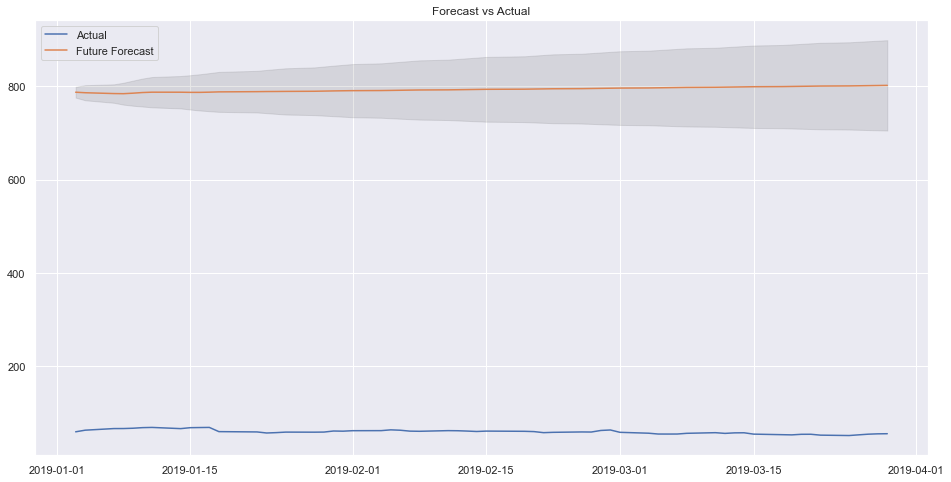

In [93]:
plt .figure(figsize=(16,8))
plt.plot(test[:step], label="Actual")
plt.plot(fc, label="Future Forecast")
plt.fill_between(lower.index, lower, upper, color="k",alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

### Tensorflow:  LSTM Model

In [690]:
df1 = data.reset_index()["Close"]

In [691]:
print(df1.shape) 
df1

(2679,)


0         4.778000
1         4.766000
2         4.392000
3         3.840000
4         3.222000
           ...    
2674    811.659973
2675    816.119995
2676    796.219971
2677    798.150024
2678    787.380005
Name: Close, Length: 2679, dtype: float64

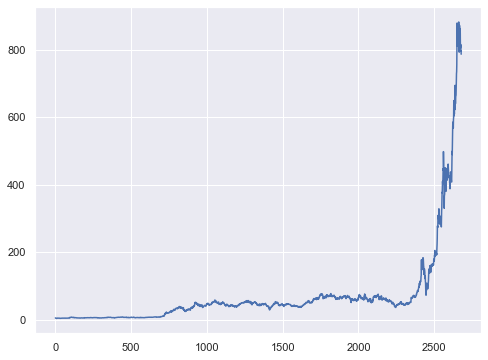

In [692]:
plt.plot(df1) 

## __Decision Tree Models and Linear Regression Models

In [199]:
#Read files:
data = pd.read_csv("tesla.csv")

In [200]:
# Get the Close Price 
df_data = data[['Close']]

In [201]:
# Create a variable to predict 'x' days Out into the future 
future_days = 90
# Create a new column (Target) shifted 'x' units /days 
df_data['Prediction'] = df_data[['Close']].shift(-future_days)
df_data.tail()

,Close,Prediction
2674,811.659973,NaN
2675,816.119995,NaN
2676,796.219971,NaN
2677,798.150024,NaN
2678,787.380005,NaN


In [202]:
#Creat the future data set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df_data.drop(['Prediction'], 1))[:-future_days]
print(X)

[[4.778000]
 [4.766000]
 [4.392000]
 ...
 [413.980011]
 [425.299988]
 [425.920013]]


In [203]:
#Creat the target data set (X) and convert it to numpy array and get all of the target 
# values except the last 'x' rows
y = np.array(df_data['Prediction'])[:-future_days]
print(y)

[4.980000 4.888000 4.996000 ... 796.219971 798.150024 787.380005]


In [204]:
# Split the data into 75% traing and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [210]:
#Create Model
from sklearn.tree import DecisionTreeRegressor
#Creae the Decision Tree Models 
tree = DecisionTreeRegressor(max_depth=6).fit(x_train, y_train)
#Creae the Linear Regression Models 
lr = LinearRegression().fit(x_train, y_train)

In [245]:
y_test_sc = y_test[558:648]

In [251]:
tree_pred = tree_predict.reshape(-1,1)
y_test_sc = y_test_sc.reshape(-1,1)
print(tree_pred.shape)

print(y_test_sc.shape) 

(90, 1)
(90, 1)


In [253]:
print("DT Model Test Accuracy Score: ", tree.score(y_test_sc, tree_pred))
print("DT Model Train Accuracy Score: ", tree.score(x_train, y_train))

DT Model Test Accuracy Score:  1.0
DT Model Train Accuracy Score:  0.9355483959579188


In [260]:
lr_pred = lr_predict.reshape(-1,1)
y_test_sc = y_test_sc.reshape(-1,1)
print(tree_pred.shape)

print(y_test_sc.shape) 

(90, 1)
(90, 1)


In [261]:
print("LR Model Test Accuracy Score: ", lr.score(y_test_sc, lr_pred))
print("LR Model Train Accuracy Score: ", lr.score(x_train, y_train))

LR Model Test Accuracy Score:  -11.588405656002077
LR Model Train Accuracy Score:  0.8666831552368126


In [211]:
# Get the Last 'x' rows of the feature dataset
x_future = df_data.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future= np.array(x_future)
x_future

array([[176.591995],
       [172.876007],
       [177.132004],
       [189.983994],
       [188.134003],
       [205.009995],
       [194.567993],
       [187.056000],
       [198.179993],
       [196.425995],
       [198.358002],
       [200.792007],
       [200.179993],
       [198.863998],
       [200.356003],
       [192.169998],
       [197.195999],
       [191.947998],
       [201.869995],
       [215.962006],
       [223.925995],
       [241.731995],
       [274.316010],
       [277.971985],
       [273.175995],
       [278.855988],
       [308.929993],
       [299.411987],
       [303.359985],
       [309.201996],
       [300.127991],
       [300.167999],
       [328.600006],
       [313.671997],
       [318.466003],
       [302.614014],
       [283.399994],
       [307.920013],
       [295.298004],
       [299.821991],
       [297.497986],
       [286.152008],
       [297.000000],
       [297.399994],
       [297.003998],
       [297.915985],
       [290.541992],
       [283.7

In [212]:
# Show the model tree prediction
tree_predict = tree.predict(x_future)
print(tree_predict)
print()
# Show the model Linear Regression prediction
lr_predict = lr.predict(x_future)
print(lr_predict)

[67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549
 67.080549 67.080549 67.080549 67.080549 67.080549 67.080549]

[169.185487 165.727316 169.688030 181.648344 179.926706 195.631836
 185.914304 178.92

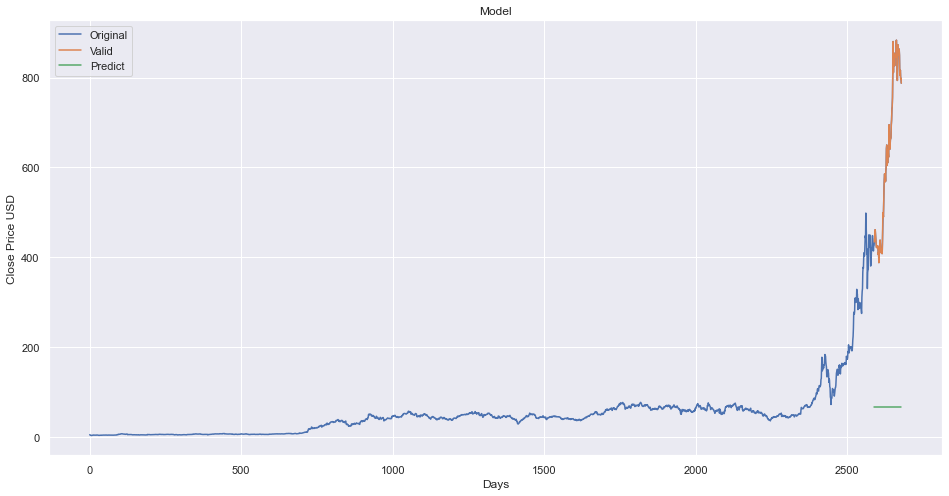

In [208]:
# Visualize the data

predictions = tree_predict
valid = df_data[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df_data['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])


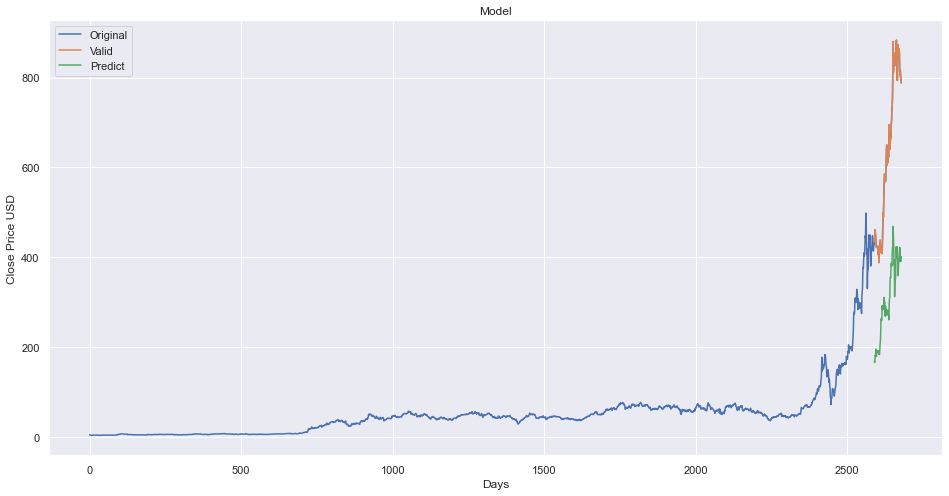

In [209]:
# Visualize the data

predictions = lr_predict

valid = df_data[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df_data['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])